## GROUP 33 MEMBERS

### 1. BARBARA ASIAMAH
### 2. EBO GHARTEY-KOOMSON
### 3. TEMILADE ADELAKUN


In [1]:
# importing all libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
from sklearn import ensemble, tree, linear_model
import matplotlib as mpl
%matplotlib inline

C:\Users\USER\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [64]:
#read data
data = pd.read_csv('data.csv', encoding = 'latin')
data.head()

,Timestamp,What is your gender,Year of graduation,Title of course studied,Polytechnic/University attended,What is your highest level of education?,What best describes your current status?,How many jobs have you had since graduation including your current one?,Have you completed your NYSC?,"If you answered yes/ongoing to the previous question, what year did you (or will you) complete your NYSC?",...,What currency are you currently paid in?,Approximately how many hours a day do you currently work?,"As far as you are aware, what was most important to your current employer about your qualification?",How do you find out about your job(s)?,"Thinking about your current employment, did you work for your employer before or during your higher education study?",Which form of transport do you use the most?,Were you able to rent an apartment or buy a car from the salary you got from your first job?,My course of study prepared me well for employment,My course of study prepared me well for further studies,Which of these skills/knowledge did your higher education prepare you for?
0,2/8/2018 9:05:23,Male,2013,Electrical & Electronic Engineering,"Obafemi Awolowo University,Ile-Ife",Bachelor's degree,Working full time (paid employment),3,NaN,NaN,...,Naira,8.0,No one thing was important,Internship,No,Bus,Yes: From my first job,No,No,"Critical thinking skills, Ability to solve com..."
1,2/15/2018 12:11:32,Male,2014,Psychology,"Obafemi Awolowo University,Ile-Ife",Bachelor's degree,Working full time (paid employment),2,Yes,2017.0,...,Naira,8.0,IT/SIWES/Internship experience (gained as part...,Internship,No,BRT,No: From my current job,Strongly Disagree,Agree,"Critical thinking skills, Ability to solve com..."
2,2/15/2018 13:47:10,Female,2013,Economics,"Bells University of Technology, Otta",Bachelor's degree,Working full time (paid employment),2,Yes,NaN,...,Naira,14.0,The subject(s) I studied,Employer's website,No,Uber/Taxify/Taxi services,No: From my current job,Disagree,Agree,"Ability to work with others, Written communica..."
3,2/16/2018 13:01:34,Male,2017,Mass Communication (Communication and Language...,"Bowen University, Iwo",Master's degree,Self-employed/freelance/entrepreneur,0,Yes,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2/16/2018 13:18:03,Female,2013,Statistics,Ekiti State University,Bachelor's degree,Working full time (paid employment),3,Yes,2016.0,...,Naira,8.0,IT/SIWES/Internship experience (gained as part...,"Personal contacts, including family and friends",No,Commercial Vehicles,No,Agree,Agree,Critical thinking skills


In [3]:
data.describe(include = 'all')

,Timestamp,What is your gender,Year of graduation,Title of course studied,Polytechnic/University attended,What is your highest level of education?,What best describes your current status?,How many jobs have you had since graduation including your current one?,Have you completed your NYSC?,"If you answered yes/ongoing to the previous question, what year did you (or will you) complete your NYSC?",...,What currency are you currently paid in?,Approximately how many hours a day do you currently work?,"As far as you are aware, what was most important to your current employer about your qualification?",How do you find out about your job(s)?,"Thinking about your current employment, did you work for your employer before or during your higher education study?",Which form of transport do you use the most?,Were you able to rent an apartment or buy a car from the salary you got from your first job?,My course of study prepared me well for employment,My course of study prepared me well for further studies,Which of these skills/knowledge did your higher education prepare you for?
count,5219,5219,5219.000000,5219,5219,5219,5219,5219.000000,5218,4278.000000,...,3432,3432.000000,3432,3432,3432,3432,3432,3432,3432,3432
unique,5205,3,NaN,127,158,6,10,NaN,3,NaN,...,2,NaN,389,7,4,10,3,5,5,69
top,3/7/2018 11:01:28,Male,NaN,Computer Science,University of Lagos,Bachelor's degree,Working full time (paid employment),NaN,Yes,NaN,...,Naira,NaN,The level of study,"Personal contacts, including family and friends",No,Commercial Vehicles,No,Agree,Agree,"Critical thinking skills, Ability to solve com..."
freq,2,2624,NaN,459,527,4402,1371,NaN,3418,NaN,...,3377,NaN,806,1448,2889,2046,2695,1574,1687,576
mean,NaN,NaN,2015.329182,NaN,NaN,NaN,NaN,1.136999,NaN,2016.579009,...,NaN,8.983683,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,1.305153,NaN,NaN,NaN,NaN,1.140146,NaN,1.354837,...,NaN,2.636293,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,2013.000000,NaN,NaN,NaN,NaN,0.000000,NaN,2013.000000,...,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,2014.000000,NaN,NaN,NaN,NaN,0.000000,NaN,2016.000000,...,NaN,8.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,2015.000000,NaN,NaN,NaN,NaN,1.000000,NaN,2017.000000,...,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,2016.000000,NaN,NaN,NaN,NaN,2.000000,NaN,2017.000000,...,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**9 columns have 5219 cells which means they have no null values**

**Timestamp has a unique value of 5205, meaning we will have to drop it for the first analysis for easier analysis**

In [4]:
data.shape #There are 5219rows and 36 columns

(5219, 36)

In [5]:
data.columns

Index(['Timestamp', 'What is your gender', 'Year of graduation',
       'Title of course studied', 'Polytechnic/University attended',
       'What is your highest level of education?',
       'What best describes your current status?',
       'How many jobs have you had since graduation including your current one?',
       'Have you completed your NYSC?',
       'If you answered yes/ongoing to the previous question, what year did you (or will you) complete your NYSC?',
       'Did you get your first full time job through your NYSC placement?',
       'Thinking about your first employment after graduation, what was your job level?',
       'What is/was your job role?',
       'What sector/industry is your company in? (E.g. Banking, Agriculture, Telecommunication)',
       'Still thinking about your first employment, what is/was your monthly income level?',
       'Did you need your higher education qualification to get your first job (the actual qualification, not the subject of study)?

In [6]:
#renaming columns
old_columns = list(data.columns.values)

new_columns=['Time','Gender','Grad_Y','Course','School','Highest_Q','Current_Stat','No_Of_Jobs','NYSC_cert','NYSC_Year',
             'Through_NYSC','FJob_Level','FJob_Role','FJob_sector','FJ_Income_Level','FJ_Required_HQ','Reason_FJ',
             'PJ_level', 'PJ_Role','PJ_Sector','PJ_Income','PJ_Required_HQ','Reason_PJ',
            'Best_Employer','Reason_Best_Employer','Most_PS','Currency','Job_Hours','Most_Important_Qualification',
             'Findout_Job','Worked_For_Employer',
            'Transport_TW','Rent_Buy','CP_Job','CP_Further_Studies','Skills_Prepared']
columns_dict = dict(zip(old_columns,new_columns))
new_data = data.rename(columns=columns_dict)
new_data.head()

,Time,Gender,Grad_Y,Course,School,Highest_Q,Current_Stat,No_Of_Jobs,NYSC_cert,NYSC_Year,...,Currency,Job_Hours,Most_Important_Qualification,Findout_Job,Worked_For_Employer,Transport_TW,Rent_Buy,CP_Job,CP_Further_Studies,Skills_Prepared
0,2/8/2018 9:05:23,Male,2013,Electrical & Electronic Engineering,"Obafemi Awolowo University,Ile-Ife",Bachelor's degree,Working full time (paid employment),3,NaN,NaN,...,Naira,8.0,No one thing was important,Internship,No,Bus,Yes: From my first job,No,No,"Critical thinking skills, Ability to solve com..."
1,2/15/2018 12:11:32,Male,2014,Psychology,"Obafemi Awolowo University,Ile-Ife",Bachelor's degree,Working full time (paid employment),2,Yes,2017.0,...,Naira,8.0,IT/SIWES/Internship experience (gained as part...,Internship,No,BRT,No: From my current job,Strongly Disagree,Agree,"Critical thinking skills, Ability to solve com..."
2,2/15/2018 13:47:10,Female,2013,Economics,"Bells University of Technology, Otta",Bachelor's degree,Working full time (paid employment),2,Yes,NaN,...,Naira,14.0,The subject(s) I studied,Employer's website,No,Uber/Taxify/Taxi services,No: From my current job,Disagree,Agree,"Ability to work with others, Written communica..."
3,2/16/2018 13:01:34,Male,2017,Mass Communication (Communication and Language...,"Bowen University, Iwo",Master's degree,Self-employed/freelance/entrepreneur,0,Yes,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2/16/2018 13:18:03,Female,2013,Statistics,Ekiti State University,Bachelor's degree,Working full time (paid employment),3,Yes,2016.0,...,Naira,8.0,IT/SIWES/Internship experience (gained as part...,"Personal contacts, including family and friends",No,Commercial Vehicles,No,Agree,Agree,Critical thinking skills


In [49]:
new_data.columns

Index(['Time', 'Gender', 'Grad_Y', 'Course', 'School', 'Highest_Q',
       'Current_Stat', 'No_Of_Jobs', 'NYSC_cert', 'NYSC_Year', 'Through_NYSC',
       'FJob_Level', 'FJob_Role', 'FJob_sector', 'FJ_Income_Level',
       'FJ_Required_HQ', 'Reason_FJ', 'PJ_level', 'PJ_Role', 'PJ_Sector',
       'PJ_Income', 'PJ_Required_HQ', 'Reason_PJ', 'Best_Employer',
       'Reason_Best_Employer', 'Most_PS', 'Currency', 'Job_Hours',
       'Most_Important_Qualification', 'Findout_Job', 'Worked_For_Employer',
       'Transport_TW', 'Rent_Buy', 'CP_Job', 'CP_Further_Studies',
       'Skills_Prepared'],
      dtype='object')

In [7]:
new_data.Gender.value_counts()

Male                 2624
Female               2592
Prefer not to say       3
Name: Gender, dtype: int64

**There are 2624 male respondents, 2592 female respondents and 3 people who prefered not to say. Gender is balanced as the male is 50.22 about percent and female 49.66 percent. Also we can afford to drop the other observations to make the data balanced**

In [8]:
#dropping the 'Prefered Not to say'
index = new_data[new_data['Gender']=='Prefer not to say'].index
new_data.drop(index, axis = 0, inplace = True)
new_data.Gender.unique()

array(['Male', 'Female'], dtype=object)

In [9]:
new_data.Grad_Y.unique()

array([2013, 2014, 2017, 2015, 2016], dtype=int64)

**From the result, we see that the questionnair was for only people who graduated between 2013 and 2017, we check for the next feature**

In [10]:
new_data.Course.value_counts()

Computer Science                                        459
Accountancy                                             373
Economics                                               321
Electrical & Electronic Engineering                     213
Mass Communication (Communication and Language Arts)    204
Business Administration                                 196
Biochemistry                                            176
Microbiology                                            170
Mechanical Engineering                                  145
English and Literary Studies                            122
Law                                                     121
History and International Studies                       114
Political Science                                       110
Chemical Engineering                                    102
Banking and Finance                                      95
Computer Engineering                                     85
Civil Engineering                       

In [11]:
def pick_top(data,interest):
    courses_counts = data[interest].value_counts() 
    low_courses=[]
    low_courses_index=[]
    for course, count in courses_counts.items():
        if count<10:
            low_courses.append(course)
    for i in low_courses:
        index = data[data[interest]==i].index
        for i in index:
            low_courses_index.append(i)
    return low_courses_index

In [12]:
dropped_courses_index= pick_top(new_data, 'Course')
major_courses = new_data.drop(dropped_courses_index, axis=0)
data_copy = major_courses

In [13]:
data_copy.School.value_counts()

University of Lagos                                                                            507
Covenant University Ota                                                                        432
Obafemi Awolowo University,Ile-Ife                                                             320
Babcock University,Ilishan-Remo                                                                208
University of Ibadan                                                                           197
University of Nigeria, Nsukka                                                                  196
University of Benin                                                                            185
University of Ilorin                                                                           177
Others (For foreign trained students)                                                          131
Ladoke Akintola University of Technology, Ogbomoso                                             113
University

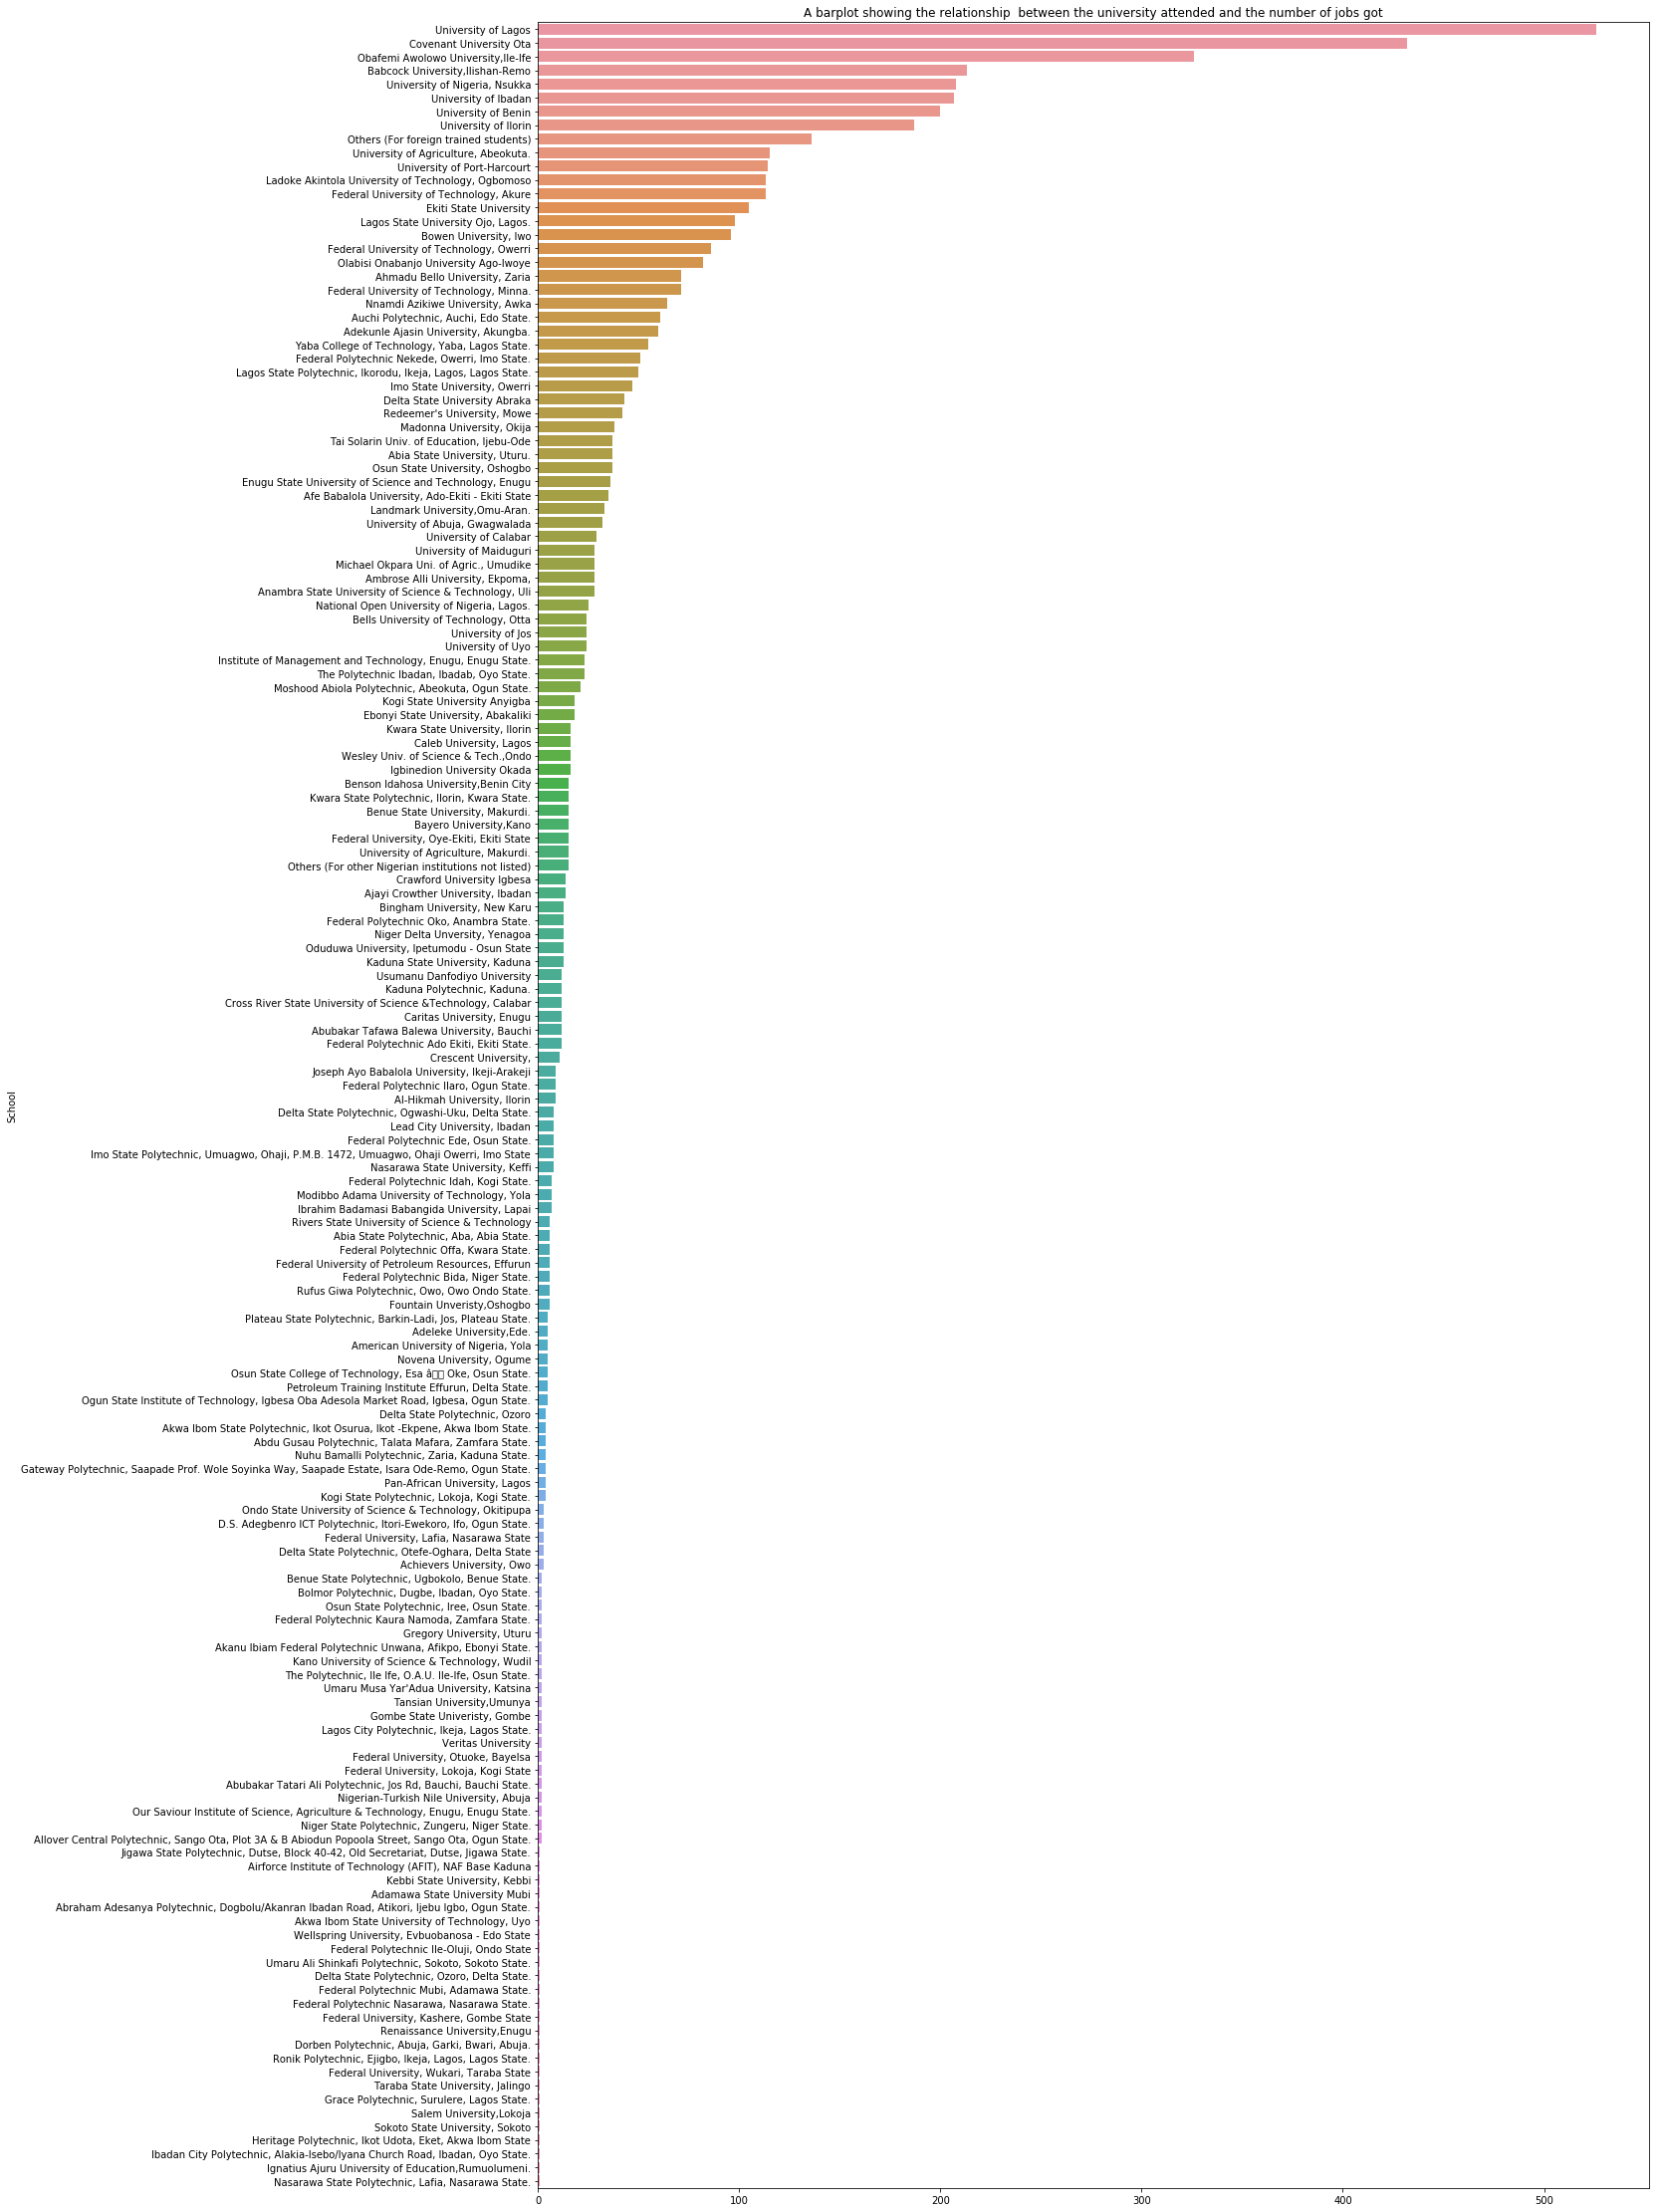

<Figure size 432x288 with 0 Axes>

In [61]:
platGenre = pd.crosstab(new_data.School,new_data.No_Of_Jobs)
platGenreTotal = platGenre.sum(axis=1).sort_values(ascending = False)
fig = plt.figure(figsize=(20,40))
sns.barplot(y = platGenreTotal.index, x = platGenreTotal.values, orient='h')
plt.title('A barplot showing the relationship  between the university attended and the number of jobs got')
plt.ylabel = "University Attended"
plt.xlabel = "Number of jobs got"
plt.show()
plt.savefig('first.jpeg');

In [15]:
dropped_schools_index = pick_top(data_copy, 'School')
major_schools = data_copy.drop(dropped_schools_index, axis=0)

In [16]:
major_schools.Highest_Q.value_counts()

Bachelor's degree                  4145
Master's degree                     285
Higher National Diploma (HND)       257
Ordinary National Diploma (OND)      81
MBA degree                           18
PhDs/Doctorate Degree                 5
Name: Highest_Q, dtype: int64

In [17]:
major_schools.Current_Stat.value_counts()

Working full time (paid employment)                                                           1267
Unemployed                                                                                    1103
Youth Corper (NYSC)                                                                            790
Self-employed/freelance/entrepreneur                                                           633
Voluntary or other unpaid work or on an internship                                             386
Engaged in full-time further study, training or research                                       159
Due to start a job in the next month/developing a professional portfolio/creative practice     139
Taking time out to prepare for further studies, GMAT, professional exams                       121
Doing something else (e.g. looking after home or family)                                       117
Engaged in part-time further study, training or research                                        76
Name: Curr

**We see that 4,145 of the respondents have a bachelor degree, 285 has Master's degree and so on, it will be insightful to see Side Note: if higher degrees means higher employability**

In [18]:
#for currency
major_schools.Currency.value_counts()

Naira               3105
Foreign currency      51
Name: Currency, dtype: int64

In [19]:
major_schools.Job_Hours.isnull().sum()

1635

In [20]:
major_schools['Job_Hours'] = major_schools['Job_Hours'].fillna(0)

In [21]:
major_schools.Most_Important_Qualification.value_counts()

The level of study                                                    738
The subject(s) I studied                                              665
IT/SIWES/Internship experience (gained as part of my course)          522
No one thing was important                                            435
Don't know                                                            413
Skill                                                                   4
Skills                                                                  3
experience                                                              3
Experience                                                              3
Ability to learn on the job                                             2
The grade I graduated with                                              2
Skill set                                                               2
Soft skills                                                             2
Experience                            

In [22]:
low_qualifications = pick_top(major_schools,'Most_Important_Qualification')
Most_qualifications = major_schools.drop(low_qualifications, axis = 0)

In [23]:
Most_qualifications.Findout_Job.value_counts()

Personal contacts, including family and friends                     1155
Social media/professional networking sites                           509
Recruitment agency/Online job site                                   490
Media (e.g. newspaper/magazine advertisement)                        228
Internship                                                           178
University/polytechnic (e.g. Careers Service, lecturer, website)     133
Employer's website                                                    80
Name: Findout_Job, dtype: int64

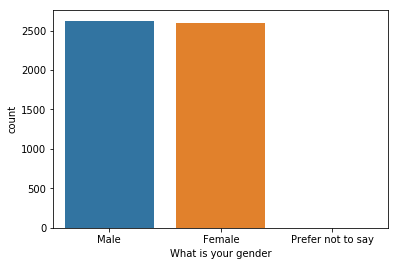

In [24]:
sns.countplot(x = 'What is your gender', data = data) #The distributioin of respondent across gender is relatively balance

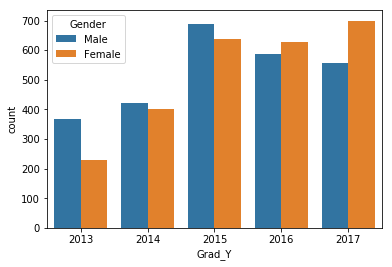

In [25]:
#year of graduation

'''
The grduation year of the respondents per gender varies as seem ini the chart.
But it is worthy of note that 2015, 2016 and 2017 graduates are more than 2013 and 2014
'''
sns.countplot(x = 'Grad_Y', hue = 'Gender', data = new_data)

In [26]:
best_course = new_data['Course'].value_counts().head(10) #The top twenty courses studied in school 
best_course

Computer Science                                        459
Accountancy                                             373
Economics                                               321
Electrical & Electronic Engineering                     213
Mass Communication (Communication and Language Arts)    204
Business Administration                                 196
Biochemistry                                            176
Microbiology                                            170
Mechanical Engineering                                  145
English and Literary Studies                            122
Name: Course, dtype: int64

In [27]:
total_course = {'Course' : ['Computer Science', 'Accountancy', 'Economics ', 
                            'Electrical & Electronic Engineering','Mass Communication (Communication and Language Arts)',
                            'Business Administration', 'Biochemistry' , 'Microbiology' , 'Mechanical Engineering', 
                            'English and Literary Studies'],'Number' : [459,373,321,213,204,196,176,170,145,122]
               }
total_C = pd.DataFrame(total_course, columns = ['Course', 'Number'])

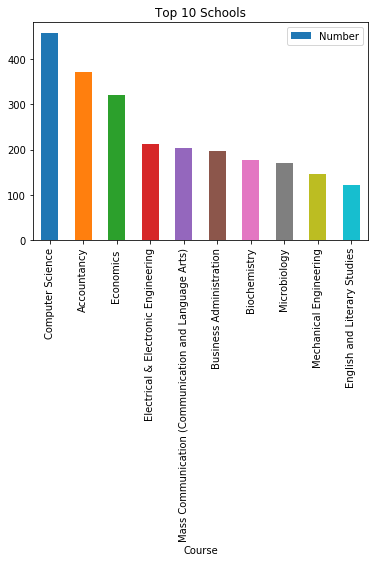

In [62]:
total_C.plot(kind='bar',x='Course',y='Number', title = 'Top 10 Schools')

In [29]:
new_data['School'].value_counts().head(10) #The top twenty schools attended 

University of Lagos                      526
Covenant University Ota                  432
Obafemi Awolowo University,Ile-Ife       326
Babcock University,Ilishan-Remo          213
University of Nigeria, Nsukka            208
University of Ibadan                     207
University of Benin                      200
University of Ilorin                     187
Others (For foreign trained students)    136
University of Agriculture, Abeokuta.     115
Name: School, dtype: int64

In [42]:
total_school = {'School' : ['University of Lagos', 'Covenant University Ota', 'Obafemi Awolowo University,Ile-Ife', 
                            'Babcock University, Ilishan-Remo','University of Nigeria, Nsukka','University of Ibadan', 
                            'University of Benin' , 'University of Ilorin' , 'Others (For foreign trained students)', 
                            'University of Agriculture, Abeokuta.'],'Number' : [526,432,326,213,208,207,200,187,136,115]
               }
total_S = pd.DataFrame(total_school, columns = ['School', 'Number'])

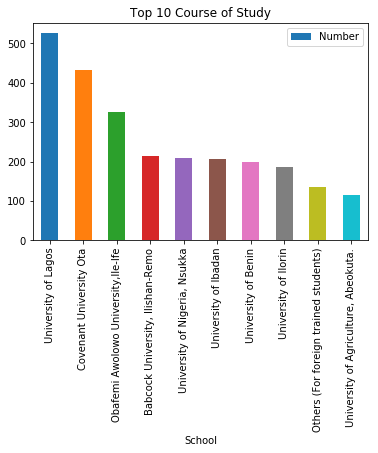

In [43]:
total_S.plot(kind='bar',x='School',y='Number', title = 'Top 10 Universities')

In [31]:
new_data['Highest_Q'].value_counts().head(10)

Bachelor's degree                  4399
Higher National Diploma (HND)       368
Master's degree                     306
Ordinary National Diploma (OND)     116
MBA degree                           20
PhDs/Doctorate Degree                 7
Name: Highest_Q, dtype: int64

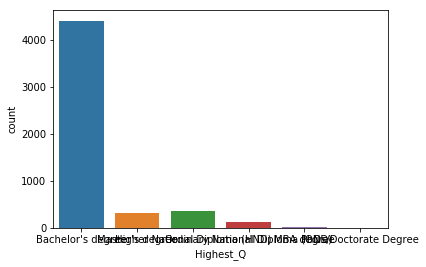

In [47]:
sns.countplot(x = 'Highest_Q', data = new_data, orient = "h")

In [33]:
'''
Distribution of number of jobs had since graduation per highest level of education

'''

pd.crosstab(new_data['Highest_Q'], new_data['No_Of_Jobs'])

No_Of_Jobs,0,1,2,3,4,5,6,7,8,10
Highest_Q,,,,,,,,,,
Bachelor's degree,1508,1513,874,389,82,23,3,1,1,5
Higher National Diploma (HND),146,131,61,19,8,1,1,0,0,1
MBA degree,2,5,5,7,1,0,0,0,0,0
Master's degree,67,99,92,34,8,4,1,1,0,0
Ordinary National Diploma (OND),61,24,18,6,2,2,1,2,0,0
PhDs/Doctorate Degree,1,4,1,1,0,0,0,0,0,0


In [48]:
'''
Distribution of current status per highest level of education

'''

pd.crosstab(new_data['Highest_Q'], new_data['Current_Stat'])

Current_Stat,Doing something else (e.g. looking after home or family),Due to start a job in the next month/developing a professional portfolio/creative practice,"Engaged in full-time further study, training or research","Engaged in part-time further study, training or research",Self-employed/freelance/entrepreneur,"Taking time out to prepare for further studies, GMAT, professional exams",Unemployed,Voluntary or other unpaid work or on an internship,Working full time (paid employment),Youth Corper (NYSC)
Highest_Q,,,,,,,,,,
Bachelor's degree,103,131,114,65,546,114,1024,366,1158,778
Higher National Diploma (HND),17,5,2,3,73,3,123,13,71,58
MBA degree,1,0,1,0,5,0,2,0,10,1
Master's degree,5,9,37,11,54,5,41,21,118,5
Ordinary National Diploma (OND),1,4,13,4,18,6,42,16,12,0
PhDs/Doctorate Degree,0,0,0,0,2,1,1,1,2,0


In [50]:
'''
Distribution of get job through NYSC placement per Title od course studied per sector of job

'''

pd.crosstab(new_data['Course'], new_data['Through_NYSC']).head(20)

Through_NYSC,I have not completed my NYSC,No,Yes
Course,,,
Accountancy,56,247,70
Acturial Science,5,6,1
Adult Education and Extra-Mural Studies,1,5,3
Agricultural Economics,5,20,9
Agricultural Extension,1,7,2
Agricultural and Bioresources Engineering,16,22,4
Agriculture,5,17,4
Agronomy,2,9,2
Anatomy,2,11,6


In [52]:
numfeat = new_data.select_dtypes(include=[np.number])
numfeat.columns

Index(['Grad_Y', 'No_Of_Jobs', 'NYSC_Year', 'Job_Hours'], dtype='object')

In [54]:
correlation = numfeat.corr()
print(correlation['Grad_Y'].sort_values(ascending = False),'\n')

Grad_Y        1.000000
NYSC_Year     0.832089
Job_Hours    -0.068301
No_Of_Jobs   -0.281329
Name: Grad_Y, dtype: float64 



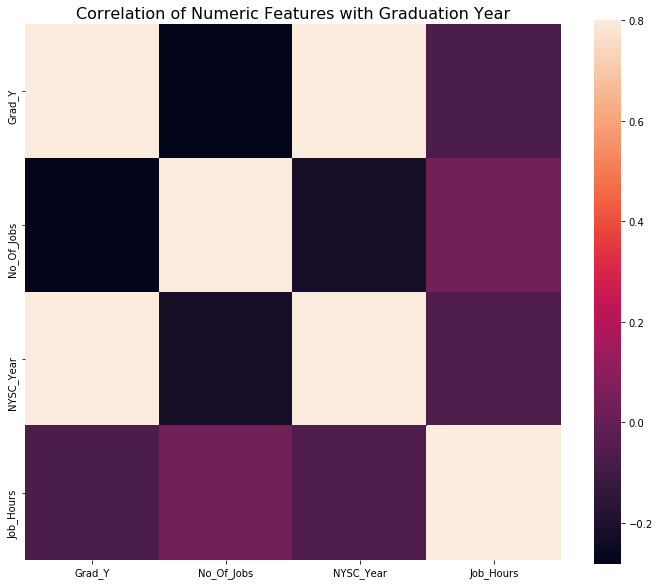

In [63]:
#correlation Heat Map
f , ax = plt.subplots(figsize = (12,10))
plt.title('Correlation of Numeric Features with Graduation Year',y=1,size=16)
sns.heatmap(correlation,square = True,  vmax=0.8)

In [36]:
'''
Distribution of get job through NYSC placement per job level

'''

pd.crosstab(data['Thinking about your first employment after graduation, what was your job level?'], data['Did you get your first full time job through your NYSC placement?']).head(20)

Did you get your first full time job through your NYSC placement?,I have not completed my NYSC,No,Yes
"Thinking about your first employment after graduation, what was your job level?",,,
Clerical and administrative,24,194,38
Entry level,103,854,184
Executive Director,0,2,1
Experience/Professional,32,136,38
Managerial,8,38,3


In [37]:
'''
Distribution of get job through NYSC placement per job role

'''

pd.crosstab(data['What is/was your job role?'], data['Did you get your first full time job through your NYSC placement?']).head(20)

Did you get your first full time job through your NYSC placement?,I have not completed my NYSC,No,Yes
What is/was your job role?,,,
Architect,5,14,6
Back-End Developer,2,8,3
Blue-collar/Artisan,1,7,2
Business Analyst,3,37,6
Business Developer,6,31,8
Business Support,5,34,4
Civil Engineer,2,6,7
Content Creator/Content Writer/ Content Developer,11,52,7
Creatives,4,32,4


In [38]:
'''
Distribution of get job through NYSC placement per company sector

'''

pd.crosstab(data['What sector/industry is your company in? (E.g. Banking, Agriculture, Telecommunication)'], data['Did you get your first full time job through your NYSC placement?']).head(20)




Did you get your first full time job through your NYSC placement?,I have not completed my NYSC,No,Yes
"What sector/industry is your company in? (E.g. Banking, Agriculture, Telecommunication)",,,
Advertising / Marketing / Comms,10,55,10
Aerospace,1,2,2
Agriculture/Poultry/Fishing,3,18,8
Banking / Financial Services,15,111,20
Blue Collar,0,2,0
Construction / Real Estate,12,52,14
Consulting,4,70,13
Creatives/Art/Design,6,24,2
Ecommerce/Internet,9,37,9


In [39]:
'''
Distribution of get job through NYSC placement per actual qualification

'''

pd.crosstab(data['Did you need your higher education qualification to get this job (the actual qualification, not the subject of study)?'], data['Did you get your first full time job through your NYSC placement?']).head(20)




       

Did you get your first full time job through your NYSC placement?,I have not completed my NYSC,No,Yes
"Did you need your higher education qualification to get this job (the actual qualification, not the subject of study)?",,,
Don't know,29,65,25
No: the qualification was not required,120,568,101
Yes: the qualification was a formal requirement,233,1330,372
Yes: while the qualification was not a formal requirement it did give me an advantage,72,407,109


In [40]:
'''
Distribution of get job through NYSC placement per company sector

'''

pd.crosstab(data['Did you need your higher education qualification to get this job (the actual qualification, not the subject of study)?'], data['What sector/industry is your company in? (E.g. Banking, Agriculture, Telecommunication)']).head(20).T


"Did you need your higher education qualification to get this job (the actual qualification, not the subject of study)?",Don't know,No: the qualification was not required,Yes: the qualification was a formal requirement,Yes: while the qualification was not a formal requirement it did give me an advantage
"What sector/industry is your company in? (E.g. Banking, Agriculture, Telecommunication)",,,,
Advertising / Marketing / Comms,1,23,35,16
Aerospace,1,0,4,0
Agriculture/Poultry/Fishing,0,5,20,4
Banking / Financial Services,5,30,94,17
Blue Collar,0,1,1,0
Construction / Real Estate,2,13,48,15
Consulting,0,12,62,13
Creatives/Art/Design,1,13,8,10
Ecommerce/Internet,2,11,29,13
